In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report

# Company data Problem

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Company_Data.csv to Company_Data.csv


In [127]:
df = pd.read_csv('Company_Data.csv')

In [128]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [130]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [131]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [ ]:
#Since we need to convert the target variable sales to categorical, we create a function that puts a row into either low or high category
#This will be dependant on the value of the sales for that row, if its higher than the expected value(mean), it will be high, else low.

In [132]:
df.insert(11,'Sales_class'," ")

for i in range(0,len(df['Sales']),1):
    if df['Sales'].iloc[i]<=7.5:
        df['Sales_class'].iloc[i]='Low'
    else:
        df['Sales_class'].iloc[i]='high'

<ipython-input-132-0cabe674f6b2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sales_class'].iloc[i]='high'
<ipython-input-132-0cabe674f6b2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sales_class'].iloc[i]='Low'


In [133]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_class
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,high
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,high
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,high
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Low
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low


In [134]:
df.drop(['Sales'], axis = 1, inplace = True)

In [135]:
df.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_class
0,138,73,11,276,120,Bad,42,17,Yes,Yes,high
1,111,48,16,260,83,Good,65,10,Yes,Yes,high
2,113,35,10,269,80,Medium,59,12,Yes,Yes,high
3,117,100,4,466,97,Medium,55,14,Yes,Yes,Low
4,141,64,3,340,128,Bad,38,13,Yes,No,Low


In [136]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df['ShelveLoc'] = LE.fit_transform(df['ShelveLoc'])
df['Urban'] = LE.fit_transform(df['Urban'])
df['US'] = LE.fit_transform(df['US'])
df['Sales_class'] = LE.fit_transform(df['Sales_class'])
df.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_class
0,138,73,11,276,120,0,42,17,1,1,1
1,111,48,16,260,83,1,65,10,1,1,1
2,113,35,10,269,80,2,59,12,1,1,1
3,117,100,4,466,97,2,55,14,1,1,0
4,141,64,3,340,128,0,38,13,1,0,0


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   CompPrice    400 non-null    int64
 1   Income       400 non-null    int64
 2   Advertising  400 non-null    int64
 3   Population   400 non-null    int64
 4   Price        400 non-null    int64
 5   ShelveLoc    400 non-null    int64
 6   Age          400 non-null    int64
 7   Education    400 non-null    int64
 8   Urban        400 non-null    int64
 9   US           400 non-null    int64
 10  Sales_class  400 non-null    int64
dtypes: int64(11)
memory usage: 34.5 KB


In [138]:
x = df.iloc[:, 0:10]
y = df['Sales_class']

In [139]:
x.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0


In [140]:
y.head()

0    1
1    1
2    1
3    0
4    0
Name: Sales_class, dtype: int64

In [141]:
y.value_counts()

0    202
1    198
Name: Sales_class, dtype: int64

In [142]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [143]:
x_train.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
336,138,35,6,60,143,0,28,18,1,0
64,100,67,12,184,104,2,32,16,0,1
55,143,81,5,60,154,2,61,18,1,1
106,102,33,0,217,139,2,70,18,0,0
300,116,78,1,158,99,2,45,11,1,1


In [144]:
x_test.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
132,125,87,9,232,136,1,72,10,1,1
309,131,111,13,33,80,0,68,18,1,1
341,98,120,0,268,93,2,72,10,0,0
196,130,28,6,410,133,0,72,16,1,1
246,120,56,20,266,90,0,78,18,1,1


In [145]:
y_train.head()

336    0
64     1
55     0
106    0
300    1
Name: Sales_class, dtype: int64

In [146]:
y_test.head()

132    1
309    1
341    0
196    0
246    0
Name: Sales_class, dtype: int64

In [147]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

[Text(0.3717105263157895, 0.9583333333333334, 'x[4] <= 105.5\ngini = 0.499\nsamples = 320\nvalue = [167, 153]'),
 Text(0.1875, 0.875, 'x[5] <= 0.5\ngini = 0.399\nsamples = 109\nvalue = [30, 79]'),
 Text(0.08771929824561403, 0.7916666666666666, 'x[1] <= 95.0\ngini = 0.488\nsamples = 26\nvalue = [15, 11]'),
 Text(0.07017543859649122, 0.7083333333333334, 'x[6] <= 42.0\ngini = 0.375\nsamples = 20\nvalue = [15, 5]'),
 Text(0.03508771929824561, 0.625, 'x[3] <= 196.0\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.017543859649122806, 0.5416666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.05263157894736842, 0.5416666666666666, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.10526315789473684, 0.625, 'x[0] <= 129.0\ngini = 0.124\nsamples = 15\nvalue = [14, 1]'),
 Text(0.08771929824561403, 0.5416666666666666, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(0.12280701754385964, 0.5416666666666666, 'x[1] <= 59.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.1052

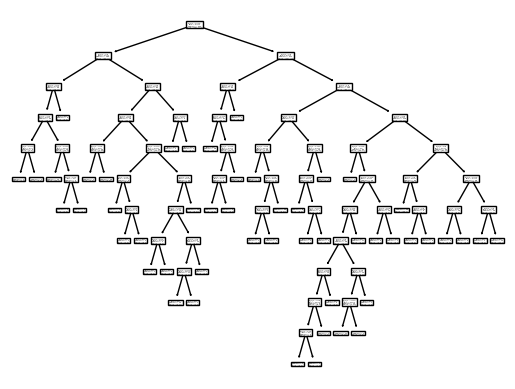

In [148]:
from sklearn import tree
tree.plot_tree(model)

In [149]:
result = model.score(x_test, y_test)
result

0.725

In [150]:
y_pred = model.predict(x_test)
y_pred

array([0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1])

In [151]:
pd.Series(y_pred).value_counts()

0    45
1    35
dtype: int64

In [152]:
y_test.value_counts()

1    45
0    35
Name: Sales_class, dtype: int64

In [153]:
pd.crosstab(y_test, y_pred)

col_0,0,1
Sales_class,,
0,29,6
1,16,29


Using Kfold accuracy test

In [154]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=5)
model = DecisionTreeClassifier()
results = cross_val_score(model, x, y, cv=kfold)

In [155]:
results

array([0.75  , 0.625 , 0.825 , 0.7625, 0.7   ])

In [156]:
results.mean()*100.0

73.25000000000001

# Fraud Check Problem

In [49]:
from google.colab import files
uploaded = files.upload()

Saving Fraud_check.csv to Fraud_check (1).csv


In [74]:
data = pd.read_csv('Fraud_check (1).csv')

In [75]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [76]:
data1 = data.rename({'Marital.Status' : 'Marital_Status', 'Taxable.Income' : 'Taxable_Income', 'City.Population' : 'City_Population', 'Work.Experience' : 'Work_Experience'}, axis = 1)

In [77]:
data1.head()

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [78]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital_Status   600 non-null    object
 2   Taxable_Income   600 non-null    int64 
 3   City_Population  600 non-null    int64 
 4   Work_Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [79]:
data1.isnull().sum()

Undergrad          0
Marital_Status     0
Taxable_Income     0
City_Population    0
Work_Experience    0
Urban              0
dtype: int64

In [ ]:
#Again just like in the previous company data problem we convert the numerical data column 'Taxable_income' to categorical.
#The condition created is as it is provided in the problem statement, taxable_income <= 30000 as "Risky" and others are "Good".

In [80]:
data1.insert(6,'Risk_level'," ")

for i in range(0,len(data1['Taxable_Income']),1):
    if data1['Taxable_Income'].iloc[i]<=30000:
        data1['Risk_level'].iloc[i]='Risky'
    else:
        data1['Risk_level'].iloc[i]='Good'

<ipython-input-80-8c8214f27c4b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Risk_level'].iloc[i]='Good'
<ipython-input-80-8c8214f27c4b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Risk_level'].iloc[i]='Risky'


In [81]:
data1.head()

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban,Risk_level
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [83]:
data1.drop(['Taxable_Income'], axis = 1, inplace = True)
data1.head()

,Undergrad,Marital_Status,City_Population,Work_Experience,Urban,Risk_level
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good


In [84]:
data1['Undergrad'] = LE.fit_transform(data1['Undergrad'])
data1['Marital_Status'] = LE.fit_transform(data1['Marital_Status'])
data1['Urban'] = LE.fit_transform(data1['Urban'])
data1['Risk_level'] = LE.fit_transform(data1['Risk_level'])
data1.head()

,Undergrad,Marital_Status,City_Population,Work_Experience,Urban,Risk_level
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0


In [85]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Undergrad        600 non-null    int64
 1   Marital_Status   600 non-null    int64
 2   City_Population  600 non-null    int64
 3   Work_Experience  600 non-null    int64
 4   Urban            600 non-null    int64
 5   Risk_level       600 non-null    int64
dtypes: int64(6)
memory usage: 28.2 KB


In [ ]:
#Creating dependant and independant variables

In [108]:
x1 = data1.iloc[:,0:5]
y1 = data1['Risk_level']

In [109]:
x1.head()

,Undergrad,Marital_Status,City_Population,Work_Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0


In [110]:
y1.head()

0    0
1    0
2    0
3    0
4    0
Name: Risk_level, dtype: int64

In [111]:
y1.value_counts()

0    476
1    124
Name: Risk_level, dtype: int64

In [ ]:
#Creating a test train split

In [90]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.2, random_state = 0)

In [112]:
x1_train.head()

,Undergrad,Marital_Status,City_Population,Work_Experience,Urban
118,0,0,199174,10,0
362,1,0,75552,17,1
55,1,2,89965,16,1
90,0,0,101232,29,0
390,1,2,57324,17,0


In [113]:
x1_test.head()

,Undergrad,Marital_Status,City_Population,Work_Experience,Urban
434,1,2,87188,19,1
122,1,1,140762,26,0
224,0,1,55717,25,1
479,1,1,68995,21,0
205,0,1,131906,20,1


In [114]:
y1_train.head()

118    1
362    1
55     1
90     0
390    0
Name: Risk_level, dtype: int64

In [115]:
y1_test.head()

434    1
122    1
224    0
479    0
205    1
Name: Risk_level, dtype: int64

In [ ]:
#Model buidling and accuracy test

In [116]:
classifier = DecisionTreeClassifier()

In [117]:
classifier.fit(x1_train, y1_train)

DecisionTreeClassifier()

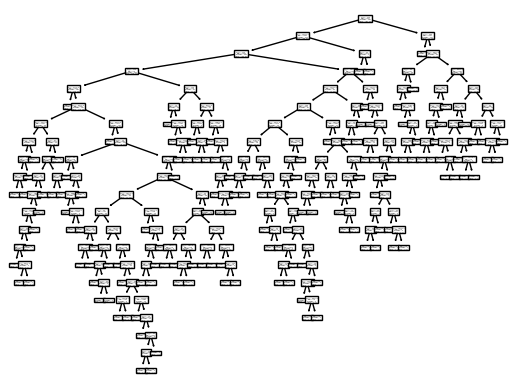

In [118]:
tree.plot_tree(classifier);

In [119]:
result1 = classifier.score(x1_test, y1_test)
result1

0.6416666666666667

In [120]:
y1_pred = classifier.predict(x1_test)
y1_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0])

In [121]:
pd.Series(y1_pred).value_counts()

0    86
1    34
dtype: int64

In [122]:
y1_test.value_counts()

0    95
1    25
Name: Risk_level, dtype: int64

In [123]:
pd.crosstab(y1_test, y1_pred)

col_0,0,1
Risk_level,,
0,69,26
1,17,8


Using K fold method

In [124]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=5)
model = classifier
results = cross_val_score(classifier, x1, y1, cv=kfold)

In [125]:
results

array([0.65833333, 0.625     , 0.64166667, 0.60833333, 0.73333333])

In [126]:
results.mean()*100.0

65.33333333333333